# Data Cleaning: happiness_project

In [1]:
import pandas as pd
import numpy as np
import re

import requests as req
from bs4 import BeautifulSoup as bs

import json

In [2]:
pd.set_option('display.max_columns', None)  # display all columns
pd.set_option('display.max_rows', None)  # display all rows

In [3]:
# Download the CSV file containing the happiness data for further analysis.

happiness_ori = pd.read_csv("/Users/david/Desktop/IronHack/Projects/ETL_project_happiness/data/raw_data/happiness_raw.csv")

## Initial data exploration

In [4]:
happiness_ori.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Data cleaning and transformation

In [5]:
# Create a copy of the original dataframe "happiness_ori"
# Make names lowercase
# Make names snake case

happiness = happiness_ori

happiness.columns = happiness.columns.str.lower()

happiness.columns = happiness.columns.str.replace(" ","_")

happiness.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
happiness.shape

(156, 9)

In [7]:
# Sort the values alphabetically by the country or region name.

happiness = happiness.sort_values("country_or_region")

happiness.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [8]:
# Create a column for the country or region ID.

happiness["overall_rank"] = range(1, len(happiness["country_or_region"]) + 1)

happiness.rename(columns={"overall_rank": "country_or_region_id"}, inplace=True)

happiness.head()

,country_or_region_id,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
153,1,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
106,2,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
87,3,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
46,4,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
115,5,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [9]:
# Select only 3 columns from the dataframe "happiness" that we are interested in: country_or_region_id, country_or_region and hapiness score.

happiness = happiness[["country_or_region_id","country_or_region","score"]]

happiness = happiness.rename(columns={"score": "happiness_score"})

happiness.head()

,country_or_region_id,country_or_region,happiness_score
153,1,Afghanistan,3.203
106,2,Albania,4.719
87,3,Algeria,5.211
46,4,Argentina,6.086
115,5,Armenia,4.559


In [10]:
happiness.shape

(156, 3)

## Scrape additional information from the web: Global Peace Index. Perform initial data exploration and data cleaning on the scraped data.

You can find the index [here](https://en.wikipedia.org/wiki/Global_Peace_Index)

In [11]:
url = 'https://en.wikipedia.org/wiki/Global_Peace_Index'

html = req.get(url).content  

html[:10]

b'<!DOCTYPE '

In [12]:
soup = bs(html, 'html.parser')

In [13]:
# global peace index

table = soup.find_all('table')

# Omit displaying table[2] due to its lengthy output.

In [14]:
# Rename the data frame to "peace_index"
# Perform initial data exploration on the "peace_index" DataFrame

table_str = str(table[2])

peace_index = pd.read_html(table_str)[0]

peace_index.head()

Country 2019[10]        2018[11]        2017[12]        2016[13]  \
       Country     Rank  Score     Rank  Score     Rank  Score     Rank   
0   Luxembourg        —      —        —      —        —      —        —   
1      Iceland        1  1.072        1  1.096        1  1.111        1   
2  New Zealand        2  1.221        2  1.192        2  1.241        4   
3     Portugal        3  1.274        4  1.318        3  1.258        5   
4      Austria        4  1.291        3  1.274        4  1.265        3   

         2015[14]        2014[15]        2013[16]        2012[17]         \
   Score     Rank  Score     Rank  Score     Rank  Score     Rank  Score   
0      —        —      —        —      —        —      —        —      —   
1  1.192        1  1.148        1  1.189        1  1.162        1  1.113   
2  1.287        4  1.221        4  1.236        3  1.237       2=  1.239   
3  1.356       11  1.344       18  1.425       18  1.467       16  1.470   
4  1.278        3  1.198        3  1.200        4  1.250       6=  1.328   

  2011[18]        2010[19]         
      Rank  Score     Rank  Score  
0        —      —       7=  1.341  
1        1  1.148        2  1.212  
2        2  1.279        1  1.188  
3       17  1.453       13  1.366  
4        6  1.337        4  1.290

In [15]:
peace_index.columns

MultiIndex([( 'Country', 'Country'),
            ('2019[10]',    'Rank'),
            ('2019[10]',   'Score'),
            ('2018[11]',    'Rank'),
            ('2018[11]',   'Score'),
            ('2017[12]',    'Rank'),
            ('2017[12]',   'Score'),
            ('2016[13]',    'Rank'),
            ('2016[13]',   'Score'),
            ('2015[14]',    'Rank'),
            ('2015[14]',   'Score'),
            ('2014[15]',    'Rank'),
            ('2014[15]',   'Score'),
            ('2013[16]',    'Rank'),
            ('2013[16]',   'Score'),
            ('2012[17]',    'Rank'),
            ('2012[17]',   'Score'),
            ('2011[18]',    'Rank'),
            ('2011[18]',   'Score'),
            ('2010[19]',    'Rank'),
            ('2010[19]',   'Score')],
           )

In [16]:
# Make names snake case

peace_index.columns = peace_index.columns.map('_'.join)

peace_index.head()

,Country_Country,2019[10]_Rank,2019[10]_Score,2018[11]_Rank,2018[11]_Score,2017[12]_Rank,2017[12]_Score,2016[13]_Rank,2016[13]_Score,2015[14]_Rank,2015[14]_Score,2014[15]_Rank,2014[15]_Score,2013[16]_Rank,2013[16]_Score,2012[17]_Rank,2012[17]_Score,2011[18]_Rank,2011[18]_Score,2010[19]_Rank,2010[19]_Score
0,Luxembourg,—,—,—,—,—,—,—,—,—,—,—,—,—,—,—,—,—,—,7=,1.341
1,Iceland,1,1.072,1,1.096,1,1.111,1,1.192,1,1.148,1,1.189,1,1.162,1,1.113,1,1.148,2,1.212
2,New Zealand,2,1.221,2,1.192,2,1.241,4,1.287,4,1.221,4,1.236,3,1.237,2=,1.239,2,1.279,1,1.188
3,Portugal,3,1.274,4,1.318,3,1.258,5,1.356,11,1.344,18,1.425,18,1.467,16,1.470,17,1.453,13,1.366
4,Austria,4,1.291,3,1.274,4,1.265,3,1.278,3,1.198,3,1.200,4,1.250,6=,1.328,6,1.337,4,1.290


In [17]:
peace_index.shape

(164, 21)

In [18]:
# Select only 2 columns from the dataframe "peace_index" that we are interested in: Country_Country and peace_index.

peace_index = peace_index[['Country_Country', '2019[10]_Score']]

peace_index = peace_index.rename(columns={"2019[10]_Score": "peace_index"})

peace_index.head()

,Country_Country,peace_index
0,Luxembourg,—
1,Iceland,1.072
2,New Zealand,1.221
3,Portugal,1.274
4,Austria,1.291


In [19]:
# Remove the first row since it does not contain any information

peace_index = peace_index.drop(index=0)

In [20]:
peace_index.isnull().sum()

Country_Country    0
peace_index        0
dtype: int64

In [21]:
peace_index.head()

,Country_Country,peace_index
1,Iceland,1.072
2,New Zealand,1.221
3,Portugal,1.274
4,Austria,1.291
5,Denmark,1.316


In [22]:
# Merge the column "peace_index" into the DataFrame "happiness".
# Rename the DataFrame "happiness" to "happiness_with_peace_index".

happiness_with_peace_index = happiness.merge(peace_index, left_on='country_or_region', right_on='Country_Country', how='left')

happiness_with_peace_index = happiness_with_peace_index.drop(columns="Country_Country")

happiness_with_peace_index.head()

,country_or_region_id,country_or_region,happiness_score,peace_index
0,1,Afghanistan,3.203,3.574
1,2,Albania,4.719,1.821
2,3,Algeria,5.211,2.219
3,4,Argentina,6.086,1.989
4,5,Armenia,4.559,2.294


In [23]:
happiness_with_peace_index.shape

(156, 4)

In [24]:
happiness_with_peace_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_region_id  156 non-null    int64  
 1   country_or_region     156 non-null    object 
 2   happiness_score       156 non-null    float64
 3   peace_index           143 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


## Scrape additional information from the web: Number of religious people by country. Perform initial data exploration and data cleaning on the scraped data.

In [25]:
url = 'https://ceoworld.biz/2020/05/16/revealed-the-worlds-most-and-least-religious-countries-based-on-religious-beliefs-2020/'

html = req.get(url).content   # o .text

html[:10]

b'<!DOCTYPE '

In [26]:
soup = bs(html, 'html.parser')

table = soup.find_all('table')

# Omit displaying table[0] due to its lengthy output.


In [27]:
# Perform initial data exploration on the web-scraped data and name the DataFrame "religious_people".

table_str = str(table[0])

religious_people = pd.read_html(table_str)[0]

religious_people.head()

,Rank,Country,Feel Religious
0,1,Somalia,99.8
1,2,Niger,99.7
2,3,Bangladesh,99.5
3,4,Ethiopia,99.3
4,5,Yemen,99.1


In [28]:
# Merge the column "feel_religious" into the dataframe "happiness_with_peace_index".
# Rename the dataframe "happiness_with_peace_index" to "happiness_with_religious".

happiness_with_religious = pd.DataFrame(happiness_with_peace_index.merge(religious_people, left_on='country_or_region', right_on='Country', how='left'))

happiness_with_religious.head()

,country_or_region_id,country_or_region,happiness_score,peace_index,Rank,Country,Feel Religious
0,1,Afghanistan,3.203,3.574,16.0,Afghanistan,97.0
1,2,Albania,4.719,1.821,125.0,Albania,39.0
2,3,Algeria,5.211,2.219,34.0,Algeria,95.0
3,4,Argentina,6.086,1.989,105.0,Argentina,65.0
4,5,Armenia,4.559,2.294,91.0,Armenia,73.0


In [29]:
# Make names snake case.
# Delete the columns "Country" and "Rank".

happiness_with_religious = happiness_with_religious.rename(columns={"Feel Religious": "feel_religious"})

happiness_with_religious = happiness_with_religious.drop(["Country", "Rank"], axis=1)

happiness_with_religious.head()

,country_or_region_id,country_or_region,happiness_score,peace_index,feel_religious
0,1,Afghanistan,3.203,3.574,97.0
1,2,Albania,4.719,1.821,39.0
2,3,Algeria,5.211,2.219,95.0
3,4,Argentina,6.086,1.989,65.0
4,5,Armenia,4.559,2.294,73.0


In [30]:
# Rename the dataframe "happiness_with_religious" to "happiness"

happiness = happiness_with_religious

In [31]:
happiness["peace_index"] = happiness["peace_index"].astype(float)

happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_or_region_id  156 non-null    int64  
 1   country_or_region     156 non-null    object 
 2   happiness_score       156 non-null    float64
 3   peace_index           143 non-null    float64
 4   feel_religious        138 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.3+ KB


In [32]:
# Create 3 new columns with descriptive information derived from the numeric columns.

happiness["happiness_score_category"] = pd.qcut(happiness["happiness_score"], q=[0, 0.25, 0.5, 0.75, 1], labels=["sad", "not_happy", "happy", "very_happy"])

happiness["peace_index_category"] = pd.qcut(happiness["peace_index"], q=[0, 0.25, 0.5, 0.75, 1], labels=["very_safe", "safe", "not_safe", "dangerous"])

happiness["feel_religious_category"] = pd.qcut(happiness["feel_religious"], q=[0, 0.25, 0.5, 0.75, 1], labels=["not_religious", "slightly_religious", "religious", "very_religious"])


happiness.head()

,country_or_region_id,country_or_region,happiness_score,peace_index,feel_religious,happiness_score_category,peace_index_category,feel_religious_category
0,1,Afghanistan,3.203,3.574,97.0,sad,dangerous,very_religious
1,2,Albania,4.719,1.821,39.0,not_happy,safe,not_religious
2,3,Algeria,5.211,2.219,95.0,not_happy,not_safe,very_religious
3,4,Argentina,6.086,1.989,65.0,happy,safe,slightly_religious
4,5,Armenia,4.559,2.294,73.0,not_happy,not_safe,slightly_religious


In [33]:
new_column_order = ['country_or_region_id', 'country_or_region', 'happiness_score', 'happiness_score_category', 'peace_index', 'peace_index_category', 'feel_religious', "feel_religious_category"]

happiness = happiness[new_column_order]

happiness.head()

,country_or_region_id,country_or_region,happiness_score,happiness_score_category,peace_index,peace_index_category,feel_religious,feel_religious_category
0,1,Afghanistan,3.203,sad,3.574,dangerous,97.0,very_religious
1,2,Albania,4.719,not_happy,1.821,safe,39.0,not_religious
2,3,Algeria,5.211,not_happy,2.219,not_safe,95.0,very_religious
3,4,Argentina,6.086,happy,1.989,safe,65.0,slightly_religious
4,5,Armenia,4.559,not_happy,2.294,not_safe,73.0,slightly_religious


In [34]:
happiness.shape

(156, 8)

In [35]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country_or_region_id      156 non-null    int64   
 1   country_or_region         156 non-null    object  
 2   happiness_score           156 non-null    float64 
 3   happiness_score_category  156 non-null    category
 4   peace_index               143 non-null    float64 
 5   peace_index_category      143 non-null    category
 6   feel_religious            138 non-null    float64 
 7   feel_religious_category   138 non-null    category
dtypes: category(3), float64(3), int64(1), object(1)
memory usage: 8.4+ KB


In [36]:
happiness.describe()

,country_or_region_id,happiness_score,peace_index,feel_religious
count,156.000000,156.000000,143.000000,138.000000
mean,78.500000,5.407096,2.076622,72.378261
std,45.177428,1.113120,0.522983,25.489662
min,1.000000,2.853000,1.072000,7.000000
25%,39.750000,4.544500,1.726000,49.250000
50%,78.500000,5.379500,2.012000,83.000000
75%,117.250000,6.184500,2.337000,94.000000
max,156.000000,7.769000,3.574000,99.800000


In [37]:
# Fill null values with the mean in numeric columns.

# Fill null values with "unknown" in the categorical columns.

happiness["peace_index"] = happiness["peace_index"].fillna(np.mean(happiness["peace_index"]))

happiness["feel_religious"] = happiness["feel_religious"].fillna(np.mean(happiness["feel_religious"]))

happiness["peace_index_category"] = happiness["peace_index_category"].cat.add_categories("unknown")

happiness["feel_religious_category"] = happiness["feel_religious_category"].cat.add_categories("unknown")

happiness["peace_index_category"].fillna("unknown", inplace=True)

happiness["feel_religious_category"].fillna("unknown",inplace=True)

happiness.head()

,country_or_region_id,country_or_region,happiness_score,happiness_score_category,peace_index,peace_index_category,feel_religious,feel_religious_category
0,1,Afghanistan,3.203,sad,3.574,dangerous,97.0,very_religious
1,2,Albania,4.719,not_happy,1.821,safe,39.0,not_religious
2,3,Algeria,5.211,not_happy,2.219,not_safe,95.0,very_religious
3,4,Argentina,6.086,happy,1.989,safe,65.0,slightly_religious
4,5,Armenia,4.559,not_happy,2.294,not_safe,73.0,slightly_religious


In [38]:
happiness.isnull().sum()

country_or_region_id        0
country_or_region           0
happiness_score             0
happiness_score_category    0
peace_index                 0
peace_index_category        0
feel_religious              0
feel_religious_category     0
dtype: int64

In [39]:
# Round the values and align the number of decimal points to prepare the data for MySQL Workbench

happiness["happiness_score"] = happiness["happiness_score"].round(2)

happiness["peace_index"] = happiness["peace_index"].round(2)

happiness["feel_religious"] = happiness["feel_religious"].round(0)

happiness.head()

,country_or_region_id,country_or_region,happiness_score,happiness_score_category,peace_index,peace_index_category,feel_religious,feel_religious_category
0,1,Afghanistan,3.20,sad,3.57,dangerous,97.0,very_religious
1,2,Albania,4.72,not_happy,1.82,safe,39.0,not_religious
2,3,Algeria,5.21,not_happy,2.22,not_safe,95.0,very_religious
3,4,Argentina,6.09,happy,1.99,safe,65.0,slightly_religious
4,5,Armenia,4.56,not_happy,2.29,not_safe,73.0,slightly_religious


In [40]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country_or_region_id      156 non-null    int64   
 1   country_or_region         156 non-null    object  
 2   happiness_score           156 non-null    float64 
 3   happiness_score_category  156 non-null    category
 4   peace_index               156 non-null    float64 
 5   peace_index_category      156 non-null    category
 6   feel_religious            156 non-null    float64 
 7   feel_religious_category   156 non-null    category
dtypes: category(3), float64(3), int64(1), object(1)
memory usage: 8.4+ KB


## Export the tables as .csv documents


In [41]:
# happiness.to_csv('/Users/david/Desktop/IronHack/Projects/ETL_project_happiness/data/cleaned_data/happiness_cleaned.csv', index=False)

# happiness.to_csv('/Users/david/Desktop/IronHack/Projects/ETL_project_happiness/data/cleaned_data/happiness_cleaned.csv', index=False, float_format='%.2f')

## Perform Data Analysis

In [42]:
happiness.head()

,country_or_region_id,country_or_region,happiness_score,happiness_score_category,peace_index,peace_index_category,feel_religious,feel_religious_category
0,1,Afghanistan,3.20,sad,3.57,dangerous,97.0,very_religious
1,2,Albania,4.72,not_happy,1.82,safe,39.0,not_religious
2,3,Algeria,5.21,not_happy,2.22,not_safe,95.0,very_religious
3,4,Argentina,6.09,happy,1.99,safe,65.0,slightly_religious
4,5,Armenia,4.56,not_happy,2.29,not_safe,73.0,slightly_religious


In [43]:
# Make a correlation analysis of the data

correlation_matrix = happiness[["happiness_score","peace_index","feel_religious"]].corr()

correlation_matrix

,happiness_score,peace_index,feel_religious
happiness_score,1.000000,-0.515868,-0.554974
peace_index,-0.515868,1.000000,0.420983
feel_religious,-0.554974,0.420983,1.000000


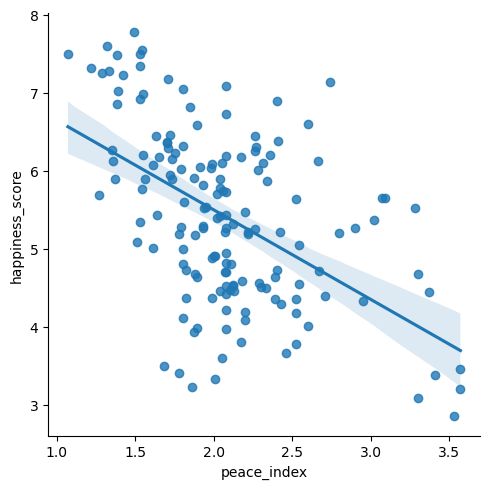

In [44]:
# Create a scatter plot to visually observe the correlation between the 'peace_index' and 'happiness_score' variables

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score

g = sns.lmplot(x='peace_index', y='happiness_score', data=happiness)

x = happiness['peace_index']
y = happiness['happiness_score']
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
r2 = r2_score(y, y_pred)

# Annotate the plot with the R-squared value
# g.fig.text(0.15, 0.9, f"R2 = {r2:.2f}", fontsize=12)

plt.show()

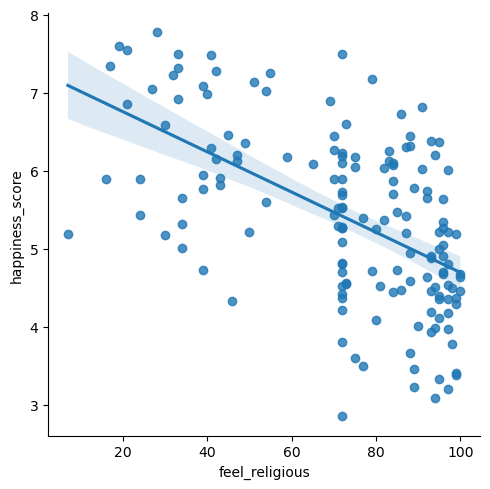

In [45]:
# Create a scatter plot to visually observe the correlation between the 'feel_religious' column and the 'happiness_score' variable.

g = sns.lmplot(x='feel_religious', y='happiness_score', data=happiness)

x = happiness['feel_religious']
y = happiness['happiness_score']
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
r2 = r2_score(y, y_pred)

# Annotate the plot with the R-squared value
# g.fig.text(0.15, 0.9, f"R2 = {r2:.2f}", fontsize=12)

plt.show()

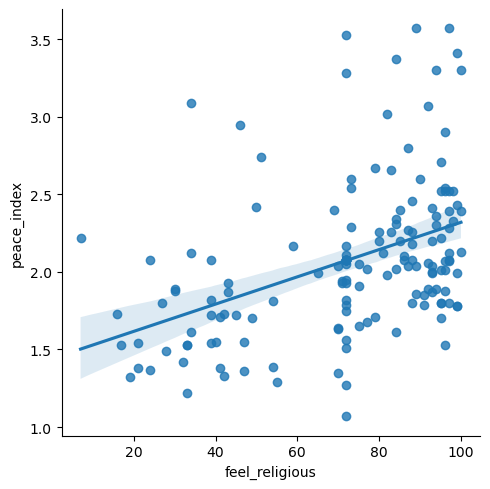

In [46]:
# Create a scatter plot to visually observe the correlation between the 'feel_religious' column and the 'peace_index' variable.

g = sns.lmplot(x='feel_religious', y='peace_index', data=happiness)

x = happiness['feel_religious']
y = happiness['peace_index']
y_pred = np.poly1d(np.polyfit(x, y, 1))(x)
r2 = r2_score(y, y_pred)

# Annotate the plot with the R-squared value
# g.fig.text(0.15, 0.9, f"R2 = {r2:.2f}", fontsize=12)

plt.show()

array([[<Axes: title={'center': 'country_or_region_id'}>,
        <Axes: title={'center': 'happiness_score'}>],
       [<Axes: title={'center': 'peace_index'}>,
        <Axes: title={'center': 'feel_religious'}>]], dtype=object)

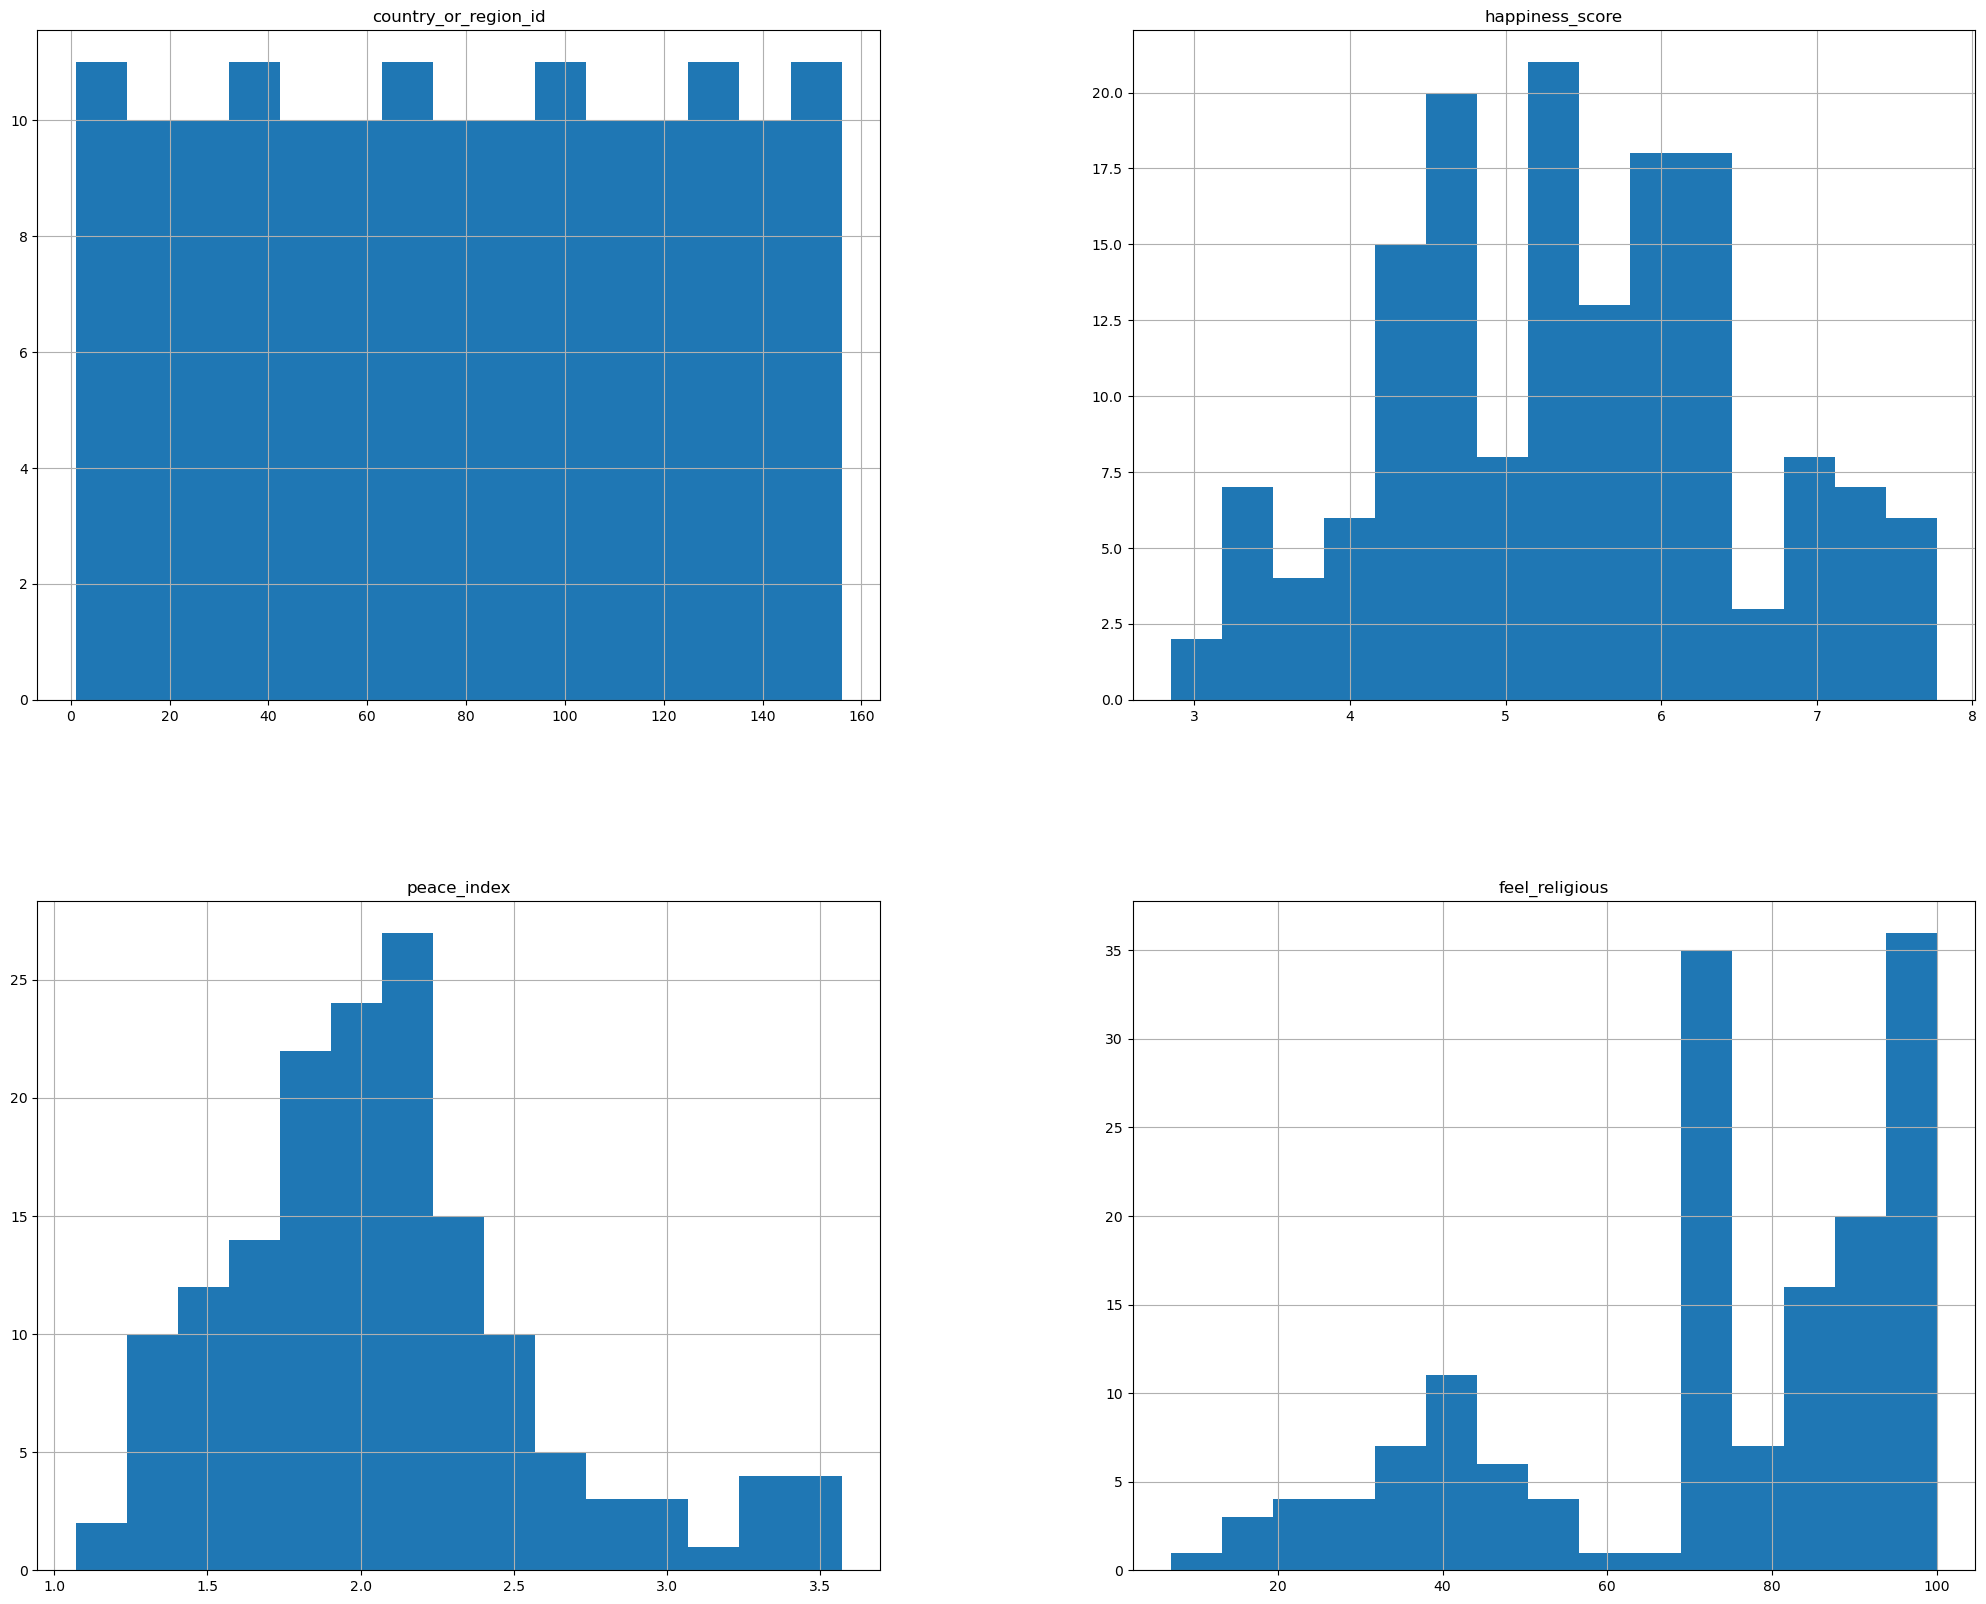

In [47]:
# Visualize the data distribution


happiness.hist(bins=15, figsize=(25, 20))

In [48]:
happiness.head()

,country_or_region_id,country_or_region,happiness_score,happiness_score_category,peace_index,peace_index_category,feel_religious,feel_religious_category
0,1,Afghanistan,3.20,sad,3.57,dangerous,97.0,very_religious
1,2,Albania,4.72,not_happy,1.82,safe,39.0,not_religious
2,3,Algeria,5.21,not_happy,2.22,not_safe,95.0,very_religious
3,4,Argentina,6.09,happy,1.99,safe,65.0,slightly_religious
4,5,Armenia,4.56,not_happy,2.29,not_safe,73.0,slightly_religious


In [49]:
# Create a pivot table based on the 'happiness_score_category' column

correlation_matrix_per_happiness = happiness.pivot_table(index=["happiness_score_category"])

correlation_matrix_per_happiness


/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_19293/331488021.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  correlation_matrix_per_happiness = happiness.pivot_table(index=["happiness_score_category"])


,country_or_region_id,feel_religious,happiness_score,peace_index
happiness_score_category,,,,
sad,83.871795,88.076923,4.005128,2.375128
not_happy,68.615385,77.974359,4.976410,2.153590
happy,81.717949,67.410256,5.818205,2.017949
very_happy,79.794872,55.897436,6.828205,1.760769


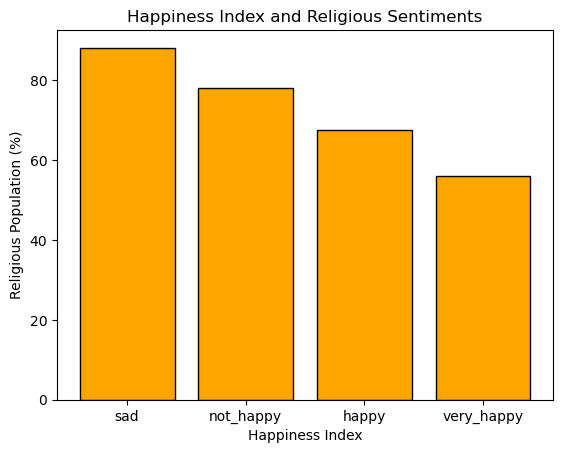

In [50]:
# Create a bar chart titled 'Happiness Index and Religious Sentiments'

selected_column = correlation_matrix_per_happiness['feel_religious']

x_values = selected_column.index

y_values = selected_column.values

plt.bar(x_values, y_values, color='orange', edgecolor='black') 

plt.xlabel('Happiness Index')
plt.ylabel('Religious Population (%)')
plt.title('Happiness Index and Religious Sentiments')

plt.show()

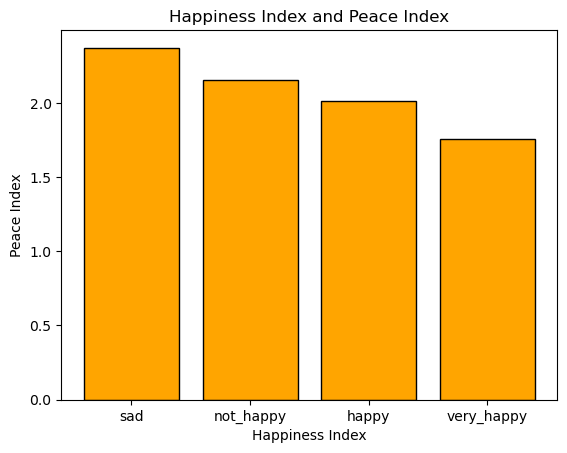

In [51]:
# Create a bar chart titled 'Happiness Index and Peace Index'


selected_column = correlation_matrix_per_happiness['peace_index']

x_values = selected_column.index

y_values = selected_column.values

plt.bar(x_values, y_values, color='orange', edgecolor='black') 

plt.xlabel('Happiness Index')
plt.ylabel('Peace Index')
plt.title('Happiness Index and Peace Index')

plt.show()